# Red Neuronal Perceptrón Multicapa (MLP)para Clasificación de Iris Setosa

Vamos a crear una red neuronal MLP pequeña para clasificar la flor Iris Setosa usando sólo NumPy. Implementaremos todo desde cero, incluyendo:

* Pasada hacia adelante
* Función de pérdida (entropía cruzada)
* Retropropagación del error
* Actualización de parámetros

Ejecute las celdas, pero estudie el código y el texto para comprender el funcionamiento.

## Importación de bibliotecas

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

## Clase MLP

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

class MLP:
    """
    Una red neuronal perceptrón multicapa (MLP) para clasificación multiclase.

    Arquitectura:
    - Capa de entrada: 4 neuronas (características de las flores)
    - Capa oculta: 5 neuronas con activación ReLU
    - Capa de salida: 3 neuronas con activación softmax (para clasificación de 3 clases)

    Usamos entropía cruzada categórica como función de pérdida.
    """

    def __init__(self, input_size=4, hidden_size=5, output_size=3):
        """
        Inicializa los parámetros de la red.

        Args:
            input_size (int): Número de características de entrada
            hidden_size (int): Número de neuronas en la capa oculta
            output_size (int): Número de neuronas en la capa de salida (clases)
        """
        # Inicialización de pesos con Xavier/Glorot initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        """
        Propagación hacia adelante (forward pass).

        Args:
            X (np.array): Datos de entrada (shape: n_muestras x n_características)

        Returns:
            tuple: (salida_capa_oculta, salida_red)
        """
        # Capa oculta
        self.z1 = np.dot(X, self.W1) + self.b1  # Combinación lineal
        self.a1 = self.relu(self.z1)             # Activación ReLU

        # Capa de salida
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # Combinación lineal
        self.a2 = self.softmax(self.z2)               # Activación softmax

        return self.a1, self.a2

    def backward(self, X, y, a1, a2, learning_rate):
        """
        Propagación hacia atrás (backward pass) y actualización de pesos.

        Args:
            X (np.array): Datos de entrada
            y (np.array): Etiquetas verdaderas (one-hot encoded)
            a1 (np.array): Salida de la capa oculta
            a2 (np.array): Salida de la red (predicciones)
            learning_rate (float): Tasa de aprendizaje
        """
        m = X.shape[0]  # Número de muestras

        # Cálculo de gradientes
        # Error en la capa de salida (derivada de la entropía cruzada + softmax)
        dz2 = a2 - y

        # Gradientes para los parámetros de la capa de salida
        dW2 = (1/m) * np.dot(a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        # Error en la capa oculta (propagación hacia atrás a través de ReLU)
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(a1)

        # Gradientes para los parámetros de la capa oculta
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        # Actualización de parámetros (descenso de gradiente)
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def compute_loss(self, y_true, y_pred):
        """
        Calcula la pérdida de entropía cruzada categórica.

        Args:
            y_true (np.array): Etiquetas verdaderas (one-hot encoded)
            y_pred (np.array): Predicciones de la red

        Returns:
            float: Valor de la pérdida
        """
        # Evitar log(0) agregando un pequeño valor
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        return loss

    def softmax(self, z):
        """Función de activación softmax."""
        # Estabilidad numérica: restar el máximo
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def relu(self, z):
        """Función de activación ReLU."""
        return np.maximum(0, z)

    def relu_derivative(self, a):
        """Derivada de la función ReLU."""
        return (a > 0).astype(float)

    def train(self, X, y, epochs=1000, learning_rate=0.01, verbose=100):
        """
        Entrena la red neuronal.

        Args:
            X (np.array): Datos de entrenamiento
            y (np.array): Etiquetas (one-hot encoded)
            epochs (int): Número de épocas de entrenamiento
            learning_rate (float): Tasa de aprendizaje
            verbose (int): Frecuencia de impresión de información
        """
        losses = []
        for epoch in range(1, epochs+1):
            # Forward pass
            a1, a2 = self.forward(X)

            # Cálculo de pérdida
            loss = self.compute_loss(y, a2)
            losses.append(loss)

            # Backward pass y actualización de pesos
            self.backward(X, y, a1, a2, learning_rate)

            if verbose and epoch % verbose == 0:
                print(f"Época {epoch}, Pérdida: {loss:.4f}")

        return losses

    def predict(self, X):
        """
        Realiza predicciones.

        Args:
            X (np.array): Datos de entrada

        Returns:
            np.array: Clases predichas (0, 1 o 2)
        """
        _, a2 = self.forward(X)
        return np.argmax(a2, axis=1)

## Carga de datos

In [3]:
# Cargar y preparar datos de Iris para clasificación multiclase
def load_iris_data_multiclass():
    iris = load_iris()
    X = iris.data
    y = iris.target.reshape(-1, 1)  # Convertir a 2D para OneHotEncoder

    # Convertir etiquetas a one-hot encoding
    encoder = OneHotEncoder(sparse_output=False)
    y_onehot = encoder.fit_transform(y)

    # Dividir en conjuntos de entrenamiento y prueba CON STRATIFY
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_onehot, test_size=0.2, random_state=42, stratify=y
    )

    # Normalizar características
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    return X_train, X_test, y_train, y_test, encoder

## Entrenamiento y prueba

In [4]:
%%timeit -n 1 -r 1

''' Entrenar y evaluar el modelo multiclase '''

# Cargar datos
X_train, X_test, y_train, y_test, encoder = load_iris_data_multiclass()

# Crear y entrenar modelo
model = MLP(input_size=4, hidden_size=5, output_size=3)
losses = model.train(X_train, y_train, epochs=5000, learning_rate=0.01, verbose=250)

# Evaluar
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Convertir one-hot encoding de vuelta a labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calcular exactitud usando sklearn.metrics.accuracy_score
train_acc = accuracy_score(y_train_labels, train_preds)
test_acc = accuracy_score(y_test_labels, test_preds)

print(f"\nExactitud en entrenamiento: {train_acc:.2%}")
print(f"Exactitud en prueba: {test_acc:.2%}")

Época 250, Pérdida: 0.5363
Época 500, Pérdida: 0.3859
Época 750, Pérdida: 0.3069
Época 1000, Pérdida: 0.2550
Época 1250, Pérdida: 0.2182
Época 1500, Pérdida: 0.1905
Época 1750, Pérdida: 0.1687
Época 2000, Pérdida: 0.1511
Época 2250, Pérdida: 0.1372
Época 2500, Pérdida: 0.1258
Época 2750, Pérdida: 0.1165
Época 3000, Pérdida: 0.1088
Época 3250, Pérdida: 0.1022
Época 3500, Pérdida: 0.0963
Época 3750, Pérdida: 0.0912
Época 4000, Pérdida: 0.0868
Época 4250, Pérdida: 0.0829
Época 4500, Pérdida: 0.0795
Época 4750, Pérdida: 0.0765
Época 5000, Pérdida: 0.0739

Exactitud en entrenamiento: 97.50%
Exactitud en prueba: 96.67%
1.44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Explicación Detallada

### 1. Inicialización

Los pesos se inicializan usando la inicialización Xavier/Glorot, que ayuda a que los gradientes fluyan mejor al inicio.

`W1` y `b1` son los pesos y sesgos de la capa oculta.

`W2` y `b2` son los pesos y sesgos de la capa de salida.

### 2. Pasada hacia adelante

#### Capa oculta:

`z1 = X·W1 + b1`: Combinación lineal de entradas y pesos

`a1 = ReLU(z1)`: Aplicación de función de activación ReLU

### Capa de salida:

`z2 = a1·W2 + b2`: Combinación lineal

`a2 = softmax(z2)`: Función Softmax para obtener probabilidades entre 0 y 1

```python
def softmax(self, z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Para estabilidad numérica
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
```

Softmax garantiza que las salidas sumen 1 (como probabilidades)

### 3. Cálculo de Pérdida

Usamos entropía cruzada binaria categórica:

```python
loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
```

Donde:

`y_true` es _one-hot encoded_ (ej. [1, 0, 0] para clase 0)

`y_pred` son las probabilidades de softmax

### 4. Retropropagación del error

#### Capa de salida:

El gradiente para softmax + entropía cruzada es sorprendentemente simple:

Error:
```python
dz2 = a2 - y  # derivada de la pérdida respecto a z2, igual que en el caso binario
```

#### Gradientes:

`dW2 = (1/m) * a1.T · dz2`

`db2 = (1/m) * sum(dz2)`

#### Capa oculta:

Error: `dz1 = (dz2 · W2.T) * ReLU'(a1)` (regla de la cadena)

#### Gradientes:

`dW1 = (1/m) * X.T · dz1`

`db1 = (1/m) * sum(dz1)`

### 5. Funciones de Activación

**ReLU**: `max(0, x)` - Simple y evita el problema de gradientes vanishing

**Sigmoid**: `1/(1 + e^-x)` - Para obtener probabilidades en la salida

### 6. Preparación de Datos

_One-hot encoding_ de las etiquetas:

```python
# Antes: [0, 1, 2]
# Después: [[1,0,0], [0,1,0], [0,0,1]]
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
```

### 7. Predicción

Para obtener la clase predicha:

```python
np.argmax(a2, axis=1)  # Devuelve el índice de la neurona con mayor probabilidad
```

### 8. Entrenamiento

El bucle de entrenamiento:

1. Calcula la pasada hacia adelante
2. Calcula la pérdida
3. Realiza la pasada hacia atrás
4. Actualiza pesos con descenso de gradiente

### 9. Explicación Matemática Detallada

#### Softmax

Para un vector de logits z = [z₁, z₂, z₃]:

$p_i = e^{z_i} / (∑_{j=1}^3 e^{z_j})$

#### Entropía Cruzada Categórica

Para una muestra con etiqueta verdadera y (one-hot) y predicción ŷ:

$L = -∑_{i=1}^3 y_i log(ŷ_i)$

#### Gradientes

La derivada de la pérdida respecto a los logits de salida (z₂) es:

$∂L/∂z₂ = ŷ - y$

Este gradiente es idéntico al caso binario, pero opera sobre vectores en lugar de escalares.

### 10. Resultados Esperados

Con este modelo se debería obtener:

* Precisión en entrenamiento > 95%
* Precisión en prueba > 90%

La red aprenderá a distinguir las 3 clases de flores Iris.

Este código implementa todos los componentes fundamentales de una red neuronal desde cero, usando solo operaciones matriciales de NumPy.

# Red Neuronal MLP para Iris con PyTorch

Esta es una implementación completa en PyTorch para clasificar las flores Iris (3 clases), con:

* 5000 épocas de entrenamiento
* Matriz de confusión
* Reporte de métricas (precision, recall, f1-score)
* Uso de funciones de accuracy de PyTorch/scikit-learn
* Código bien comentado comparando con la versión manual anterior

Al igual que con la implementación anterior corra la celda pero estudie el código con sus comentarios para comprender el funcionamiento y aprender a utilizar Pytorch.

Nota: Si desean utilizar GPU en lugar de CPU deben hacer una ligera modificación al código, aprenda como hacerlo investigando al respecto.

## Importación de bibliotecas

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Carga de datos

In [6]:
# 1. Cargar y preparar datos (similar a load_iris_data anterior)
def load_iris_data():
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Dividir en train/test (80/20) estratificado
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Normalizar (como en la versión manual)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convertir a tensores PyTorch
    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)  # Para CrossEntropyLoss
    X_test = torch.FloatTensor(X_test)
    y_test = torch.LongTensor(y_test)

    return X_train, X_test, y_train, y_test, iris.target_names

## Clase MLP

In [7]:
# 2. Definir la red neuronal (análogo a MLP anterior)
class MLP(nn.Module):
    def __init__(self, input_size=4, hidden_size=5, output_size=3):
        super().__init__()
        # Capa oculta (como W1 y b1 en la versión manual)
        self.hidden = nn.Linear(input_size, hidden_size)
        # Capa de salida (como W2 y b2)
        self.output = nn.Linear(hidden_size, output_size)
        # Función de activación ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        # Forward pass (igual que en la versión manual)
        x = self.hidden(x)      # z1 = X·W1 + b1
        x = self.relu(x)        # a1 = ReLU(z1)
        x = self.output(x)      # z2 = a1·W2 + b2
        # No aplicamos softmax aquí, CrossEntropyLoss lo incluye
        return x

## Entrenamiento y prueba

Entrenando modelo...
Época 500, Pérdida: 0.0426
Época 1000, Pérdida: 0.0402
Época 1500, Pérdida: 0.0401
Época 2000, Pérdida: 0.0401
Época 2500, Pérdida: 0.0401
Época 3000, Pérdida: 0.0400
Época 3500, Pérdida: 0.0400
Época 4000, Pérdida: 0.0400
Época 4500, Pérdida: 0.0400
Época 5000, Pérdida: 0.0400

Evaluación del modelo:

Exactitud: 100.00%

Matriz de Confusión:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



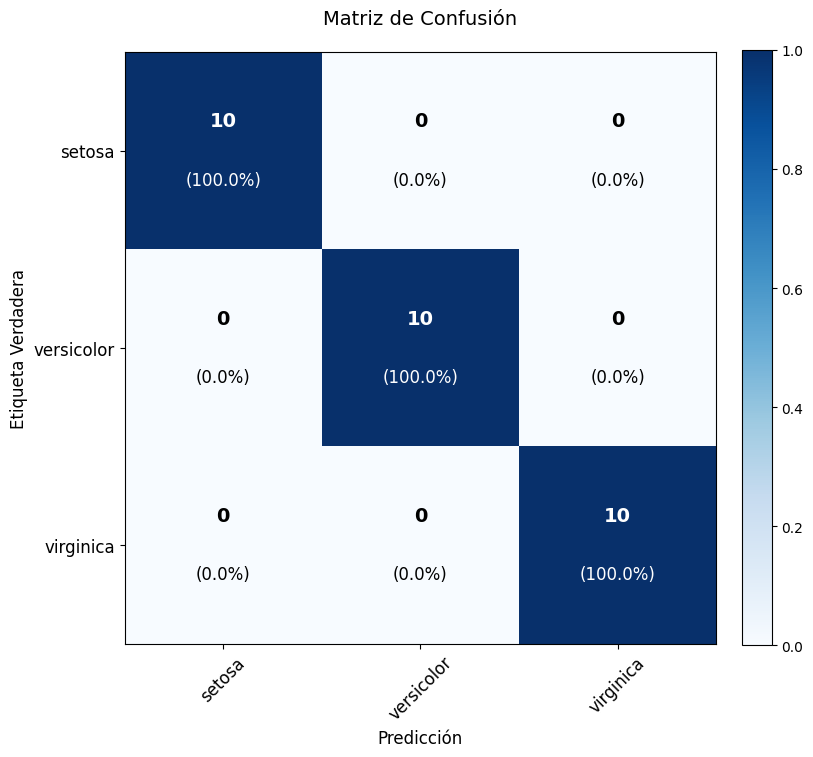

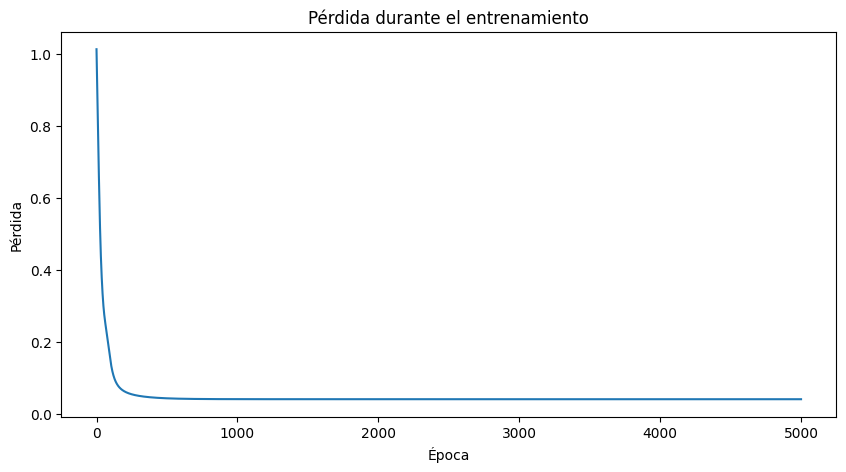

12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1

# 3. Entrenamiento (análogo al train anterior pero con PyTorch)
def train_model(model, X_train, y_train, epochs=5000, lr=0.01):
    criterion = nn.CrossEntropyLoss()  # Incluye softmax + entropía cruzada
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Optimizador más avanzado

    losses = []
    for epoch in range(1, epochs+1):
        # PPasada hacia adelante
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Pasada hacia atrás y optimización (retropropagación automática)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if epoch % 500 == 0:
            print(f'Época {epoch}, Pérdida: {loss.item():.4f}')

    return losses

# 4. Evaluación y métricas
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión'):
    """Matriz combinada con valores absolutos y relativos"""
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_norm, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.title(title, pad=20, fontsize=14)
    plt.colorbar(fraction=0.046, pad=0.04)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    # Umbral para color del texto
    thresh = 0.5

    # Añadir valores absolutos y porcentajes
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i-0.15, f"{cm[i, j]}",  # Valor absoluto arriba
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=14, fontweight='bold')

        plt.text(j, i+0.15, f"({cm_norm[i, j]:.1%})",  # Porcentaje abajo
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=12)

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera', fontsize=12)
    plt.xlabel('Predicción', fontsize=12)
    plt.show()

def evaluate_model(model, X_test, y_test, target_names):
    with torch.no_grad():
        outputs = model(X_test)
        _, preds = torch.max(outputs, 1)

        acc = accuracy_score(y_test, preds)
        print(f'\nExactitud: {acc:.2%}')

        cm = confusion_matrix(y_test, preds)
        print('\nMatriz de Confusión:')
        print(cm)

        print('\nReporte de Clasificación:')
        print(classification_report(y_test, preds, target_names=target_names))

        plot_confusion_matrix(cm, target_names)

# 5. Ejecución principal
# Cargar datos
X_train, X_test, y_train, y_test, target_names = load_iris_data()

# Crear modelo
model = MLP(input_size=4, hidden_size=5, output_size=3)

# Entrenar
print("Entrenando modelo...")
losses = train_model(model, X_train, y_train, epochs=5000)

# Evaluar
print("\nEvaluación del modelo:")
evaluate_model(model, X_test, y_test, target_names)

# Gráfico de pérdida
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim

# Cargar datos
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values.reshape(-1, 1)

# Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ejercicio: Implemente un MLP para los datos de diabetes manualmente

Implemente un MLP para los datos de indios de diabetes usando el método manual Numpy.  La implementación debe ser manual, igual al primer ejemplo de Iris Setosa.

Tenga en cuenta que como es un problema binario, no multiclase debe utilizar como función de activación final la sigmoide, no la softmax.

Además, la pérdida debe ser con entropía cruzada binaria. Esta función se define así:

$L = -[y·log(ŷ) + (1-y)·log(1-ŷ)]$

Donde:

`y` es la etiqueta verdadera (0 o 1)

`ŷ` es la predicción de la red (probabilidad entre 0 y 1)


In [12]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
lr = 0.01
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    return sigmoid(z) * (1 - sigmoid(z))

def binary_cross_entropy(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

for epoch in range(epochs):
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_hat = sigmoid(Z2)

    loss = binary_cross_entropy(y_train, y_hat)

    dZ2 = y_hat - y_train
    dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
    db2 = np.mean(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_deriv(Z1)
    dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
    db1 = np.mean(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"[MLP Manual] Epoca {epoch}, Perdida: {loss:.4f}")

# Evaluación Manual MLP
y_pred_manual = (sigmoid(np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2) > 0.5).astype(int)

[MLP Manual] Epoca 0, Perdida: 0.5744
[MLP Manual] Epoca 100, Perdida: 0.5222
[MLP Manual] Epoca 200, Perdida: 0.5068
[MLP Manual] Epoca 300, Perdida: 0.5003
[MLP Manual] Epoca 400, Perdida: 0.4963
[MLP Manual] Epoca 500, Perdida: 0.4932
[MLP Manual] Epoca 600, Perdida: 0.4905
[MLP Manual] Epoca 700, Perdida: 0.4882
[MLP Manual] Epoca 800, Perdida: 0.4861
[MLP Manual] Epoca 900, Perdida: 0.4842


# Ejercicio: Implemente un MLP para los datos de diabetes con Pytorch

Implemente un MLP para los datos de indios de diabetes utilizando Pytorch.  De nuevo, tenga en cuenta que es un problema binario, no multiclase y haga los cambios necesarios.

In [14]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

model = nn.Sequential(
    nn.Linear(8, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"[MLP PyTorch] Epoca {epoch}, Perdida: {loss.item():.4f}")

with torch.no_grad():
    y_pred_test = model(X_test_t)
    y_pred_labels = (y_pred_test > 0.5).int().numpy()

[MLP PyTorch] Epoca 0, Perdida: 0.7417
[MLP PyTorch] Epoca 100, Perdida: 0.4322
[MLP PyTorch] Epoca 200, Perdida: 0.3969
[MLP PyTorch] Epoca 300, Perdida: 0.3686
[MLP PyTorch] Epoca 400, Perdida: 0.3545
[MLP PyTorch] Epoca 500, Perdida: 0.3437
[MLP PyTorch] Epoca 600, Perdida: 0.3288
[MLP PyTorch] Epoca 700, Perdida: 0.3228
[MLP PyTorch] Epoca 800, Perdida: 0.3220
[MLP PyTorch] Epoca 900, Perdida: 0.3218


# Ejercicio: Comparación de Regresión Lineal Múltiple, Árbol de Decisión y Perceptrón Multicapa

Copie acá para sus resultados para los datos indios de diabetes los códigos de sus mejores modelos de Regresión Lineal Múltiple y Árbol de Decisión.  Realice una tabla donde compara dichos datos indios de diabetes con las métricas resultado de la Regresión Lineal Múltiple, el Árbol de Decisión y el Perceptrón Multicapa.  Escoja para cada uno la mejor métrica que obtuvo.

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel())
y_pred_lr = logreg.predict(X_test)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.ravel())
y_pred_tree = tree.predict(X_test)

def get_metrics(y_true, y_pred):
    return {
        'Exactitud': accuracy_score(y_true, y_pred),
        'Precisión': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
    }

results = pd.DataFrame({
    'Regresión Logística': get_metrics(y_test, y_pred_lr),
    'Arbol Decisión': get_metrics(y_test, y_pred_tree),
    'MLP Manual': get_metrics(y_test, y_pred_manual),
    'MLP PyTorch': get_metrics(y_test, y_pred_labels)
})

print("\nComparación de modelos:")
print(results)



Comparación de modelos:
           Regresión Logística  Arbol Decisión  MLP Manual  MLP PyTorch
Exactitud             0.753247        0.766234    0.740260     0.707792
Precisión             0.649123        0.650794    0.641509     0.586207
Recall                0.672727        0.745455    0.618182     0.618182
F1                    0.660714        0.694915    0.629630     0.601770
